In [71]:
# generation of simulation data for MIMOSCA
import pandas as pd
import numpy as np
import matplotlib
import matplotlib.pyplot as plt
matplotlib.use('Agg')
matplotlib.rcParams['pdf.fonttype'] = 42
import sklearn
from sklearn import linear_model
import seaborn as sns
sns.set_context('talk')
sns.set_style('white')
sns.set_style('ticks')

In [78]:
%matplotlib inline

In [14]:
# perturbationされていない場合（コマンドから生成したい）
i=0
df_Ei_no_per = pd.read_csv("dyn-LL-1_no_pertubation/simulations_perturbation/E{}.csv".format(i), index_col=0)
Y = pd.DataFrame(index=[], columns=df_Ei_no_per.index)
for i in range(1,11):
    print(i)
    df_Ei_no_per = pd.read_csv("dyn-LL-1_no_pertubation/simulations_perturbation/E{}.csv".format(i), index_col=0)
    Y = Y.append(df_Ei_no_per["E{}_100".format(i)], ignore_index=True)
Y

1
2
3
4
5
6
7
8
9
10


,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1.898033,1.714944,2.015730,2.068156,1.755593,1.542570,1.770316,2.061654,2.152815,1.696550,2.024141,2.511822,1.792906,0.002090,0.015394,0.020619,0.001192,0.150655
1,1.801591,1.930314,1.198910,2.395803,1.508246,2.065683,1.577413,2.086645,1.770260,1.793582,1.800121,2.698503,0.713333,0.015531,0.058977,0.008790,0.001716,0.001307
2,1.676841,1.949797,1.742754,1.990365,2.561848,1.834872,1.482949,2.285071,2.524789,1.861684,1.645609,2.143349,0.182323,0.015885,0.004305,0.000819,0.040485,0.021241
3,2.628259,1.482727,1.473378,1.942088,1.941625,1.825502,2.107435,1.634745,2.133829,2.067907,2.365748,1.549827,0.041829,0.004471,0.003544,0.010007,0.010516,0.011537
4,1.578383,2.274177,2.107928,1.866069,2.535503,2.299411,1.407616,2.245034,1.985648,2.018749,2.035523,2.234384,0.007581,0.065532,0.014253,0.038717,0.007549,0.019992
5,1.584482,2.253292,2.146435,2.635190,1.718467,1.669741,2.086384,2.554910,2.094026,1.425510,0.003847,0.010188,0.004433,0.027236,0.007635,0.001023,0.030409,0.042313
6,2.414967,1.748108,2.006834,1.942705,1.739367,1.787407,2.410401,1.549311,2.237171,1.801434,2.146929,1.928146,2.220719,0.202736,0.011514,0.005290,0.010558,0.015471
7,2.130356,2.230023,2.301656,2.940220,2.070631,1.692988,2.109517,1.577858,1.512874,1.642179,2.344005,1.596643,2.130134,0.592586,0.021703,0.066614,0.006833,0.003820
8,1.877969,1.575931,1.622762,1.640164,1.986339,1.550390,1.811896,2.230669,1.320583,2.111219,2.276120,1.435567,0.955962,0.001935,0.011587,0.019335,0.010175,0.049120
9,0.800733,0.039603,1.999734,1.999035,1.977731,1.960397,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [31]:
# no perturbation
i=0
df_Ei_no_per = pd.read_csv("Synthetic-H/dyn-LL-1/simulations_perturbation/E{}.csv".format(i),index_col=0)
Y = pd.DataFrame(index=[], columns=df_Ei_no_per.index)
for i in range(10):
    df_Ei_per = pd.read_csv("Synthetic-H/dyn-LL-1/simulations_perturbation/E{}.csv".format(i),index_col=0)
    Y = Y.append(df_Ei_per["E{}_100".format(i)], ignore_index=True)
Y

,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,2.173900,1.985515,2.789109,1.626771,2.020983,2.222753,2.167666,2.039142,2.041371,2.246250,1.507587,2.126228,1.534061,0.029494,0.033681,0.007364,0.010623,0.113601
1,1.898033,1.714944,2.015730,2.068156,1.755593,1.542570,1.770316,2.061654,2.152815,1.696550,2.024141,2.511822,1.792906,0.002090,0.015394,0.020619,0.001192,0.150655
2,1.801591,1.930314,1.198910,2.395803,1.508246,2.065683,1.577413,2.086645,1.770260,1.793582,1.800121,2.698503,0.713333,0.015531,0.058977,0.008790,0.001716,0.001307
3,1.676841,1.949797,1.742754,1.990365,2.561848,1.834872,1.482949,2.285071,2.524789,1.861684,1.645609,2.143349,0.182323,0.015885,0.004305,0.000819,0.040485,0.021241
4,2.628259,1.482727,1.473378,1.942088,1.941625,1.825502,2.107435,1.634745,2.133829,2.067907,2.365748,1.549827,0.041829,0.004471,0.003544,0.010007,0.010516,0.011537
5,1.578383,2.274177,2.107928,1.866069,2.535503,2.299411,1.407616,2.245034,1.985648,2.018749,2.035523,2.234384,0.007581,0.065532,0.014253,0.038717,0.007549,0.019992
6,1.584482,2.253292,2.146435,2.635190,1.718467,1.669741,2.086384,2.554910,2.094026,1.425510,0.003847,0.010188,0.004433,0.027236,0.007635,0.001023,0.030409,0.042313
7,2.414967,1.748108,2.006834,1.942705,1.739367,1.787407,2.410401,1.549311,2.237171,1.801434,2.146929,1.928146,2.220719,0.202736,0.011514,0.005290,0.010558,0.015471
8,2.130356,2.230023,2.301656,2.940220,2.070631,1.692988,2.109517,1.577858,1.512874,1.642179,2.344005,1.596643,2.130134,0.592586,0.021703,0.066614,0.006833,0.003820
9,1.877969,1.575931,1.622762,1.640164,1.986339,1.550390,1.811896,2.230669,1.320583,2.111219,2.276120,1.435567,0.955962,0.001935,0.011587,0.019335,0.010175,0.049120


In [49]:
for i in range(10):
    df_Ei_per = pd.read_csv("Synthetic-H/dyn-LL-1/simulations_perturbation/E{}.csv".format(i),index_col=0)
    Y = Y.append(df_Ei_per["E{}_100".format(i)], ignore_index=True)
Y

,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,2.173900,1.985515,2.789109,1.626771,2.020983,2.222753,2.167666,2.039142,2.041371,2.246250,1.507587,2.126228,1.534061,0.029494,0.033681,0.007364,0.010623,0.113601
1,1.898033,1.714944,2.015730,2.068156,1.755593,1.542570,1.770316,2.061654,2.152815,1.696550,2.024141,2.511822,1.792906,0.002090,0.015394,0.020619,0.001192,0.150655
2,1.801591,1.930314,1.198910,2.395803,1.508246,2.065683,1.577413,2.086645,1.770260,1.793582,1.800121,2.698503,0.713333,0.015531,0.058977,0.008790,0.001716,0.001307
3,1.676841,1.949797,1.742754,1.990365,2.561848,1.834872,1.482949,2.285071,2.524789,1.861684,1.645609,2.143349,0.182323,0.015885,0.004305,0.000819,0.040485,0.021241
4,2.628259,1.482727,1.473378,1.942088,1.941625,1.825502,2.107435,1.634745,2.133829,2.067907,2.365748,1.549827,0.041829,0.004471,0.003544,0.010007,0.010516,0.011537
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,1.578384,2.274177,2.107928,1.866069,2.535503,2.299411,1.407616,2.245034,1.985648,2.018749,2.035523,2.234384,0.007581,0.065532,0.014253,0.038717,0.007549,0.018953
186,1.584484,2.253292,2.146435,2.635190,1.718467,1.669741,2.086384,2.554910,2.094026,1.425510,0.003847,0.010188,0.004433,0.027236,0.007635,0.001023,0.030409,0.039618
187,2.414968,1.748108,2.006834,1.942705,1.739367,1.787407,2.410401,1.549311,2.237171,1.801434,2.146929,1.928146,2.220719,0.202736,0.011514,0.005290,0.010558,0.012632
188,2.130356,2.230023,2.301656,2.940220,2.070631,1.692988,2.109517,1.577858,1.512874,1.642179,2.344005,1.596643,2.130134,0.592586,0.021703,0.066614,0.006833,0.003466


In [51]:
Y.to_csv('LL_cell=10_t=100_allperturb.csv')

In [53]:
# design_matrix X
cols = Y.columns
cols = cols.insert(0, "control")
cols

Index(['control', 'g1', 'g2', 'g3', 'g4', 'g5', 'g6', 'g7', 'g8', 'g9', 'g10',
       'g11', 'g12', 'g13', 'g14', 'g15', 'g16', 'g17', 'g18'],
      dtype='object')

In [54]:
X = pd.DataFrame(index=[], columns=cols)
X

,control,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18


In [65]:
for i in range(len(cols)):
    for j in range(10):
        a = np.zeros(len(cols))
        a[i] = 1
        record = pd.Series(a, index=X.columns)
        X = X.append(record, ignore_index=True)
X

,control,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0
188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0


In [141]:
X.iloc[11:20]

,control,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
11,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
12,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
13,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
14,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
15,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
16,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
17,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
18,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
19,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0


In [72]:
def bayes_cov_col(Y,X,cols,lm):
    """
    @Y    = Expression matrix, cells x x genes, expecting pandas dataframe
    @X    = Covariate matrix, cells x covariates, expecting pandas dataframe
    @cols = The subset of columns that the EM should be performed over, expecting list
    @lm   = linear model object
    """

    #EM iterateit
    Yhat=pd.DataFrame(lm.predict(X))
    Yhat.index=Y.index
    Yhat.columns=Y.columns
    SSE_all=np.square(Y.subtract(Yhat))
    X_adjust=X.copy()


    df_SSE   = []
    df_logit = []

    for curcov in cols:

        curcells=X[X[curcov]>0].index

        if len(curcells)>2:

            X_notcur=X.copy()
            X_notcur[curcov]=[0]*len(X_notcur)

            X_sub=X_notcur.loc[curcells]

            Y_sub=Y.loc[curcells]

            GENE_var=2.0*Y_sub.var(axis=0)
            vargenes=GENE_var[GENE_var>0].index

            Yhat_notcur=pd.DataFrame(lm.predict(X_sub))
            Yhat_notcur.index=Y_sub.index
            Yhat_notcur.columns=Y_sub.columns

            SSE_notcur=np.square(Y_sub.subtract(Yhat_notcur))
            SSE=SSE_all.loc[curcells].subtract(SSE_notcur)
            SSE_sum=SSE.sum(axis=1)

            SSE_transform=SSE.div(GENE_var+0.5)[vargenes].sum(axis=1)
            logitify=np.divide(1.0,1.0+np.exp(SSE_transform))#sum))

            df_SSE.append(SSE_sum)
            df_logit.append(logitify)

            X_adjust[curcov].loc[curcells]=logitify

    return X_adjust

In [113]:
#Fit regression model
#lm=sklearn.linear_model.Ridge()
lm=sklearn.linear_model.ElasticNet(l1_ratio=0.5, alpha=0.0005, max_iter=10000)
lm.fit(X,Y)
B=pd.DataFrame(lm.coef_)

In [154]:
lm.intercept_

array([1.97595483, 1.91356465, 1.93923332, 2.10347865, 1.9828878 ,
       1.84823003, 1.89217248, 2.02559544, 1.97634343, 1.86508996,
       1.8137036 , 1.82194692, 0.95653972, 0.09442035, 0.01821339,
       0.01758874, 0.01303204, 0.04279685])

In [114]:
B = B.T

In [115]:
B.columns = Y.columns
B.index = X.columns

In [116]:
B

,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
control,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.0,0.0
g1,-0.983875,-0.321749,-0.002827,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.0,0.0
g2,0.000000,-0.964377,-0.466796,-0.002439,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.0,0.0
g3,0.000000,0.000000,-0.964034,-0.272961,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.0,0.0
g4,0.000000,0.000000,0.000000,-1.016589,-0.270224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.0,0.0
g5,0.000000,0.000000,0.000000,0.000000,-0.983290,-0.239134,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.0,0.0
g6,0.000000,0.000000,0.000000,0.000000,0.000000,-0.944032,-0.322224,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.0,0.0
g7,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.957540,-0.163157,-0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.0,0.0
g8,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.996578,-0.179951,-0.089801,0.000000,0.000000,0.000000,0.000000,0.0,0.000000,-0.0,0.0
g9,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,-0.982793,-0.557852,-0.037149,0.000000,0.000000,0.000000,0.0,0.000000,-0.0,0.0


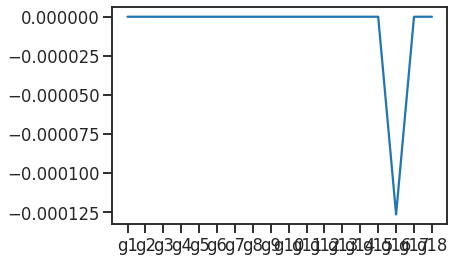

In [152]:
plt.plot(B.iloc[16])

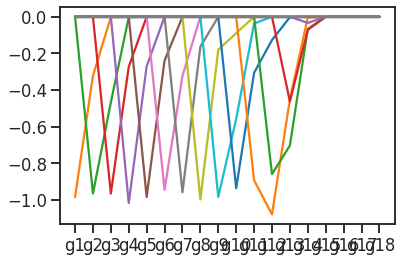

In [118]:
for i in range(18):
    plt.plot(B.iloc[i,:])

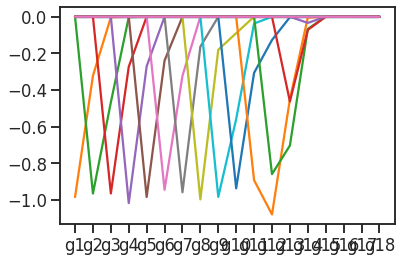

In [121]:
for i in range(17):
    plt.plot(B.iloc[i])

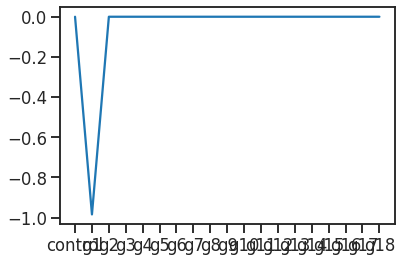

In [122]:
plt.plot(B['g1'])

In [124]:
X_adjust=bayes_cov_col(Y,X,X.columns,lm)
lm_adjust=sklearn.linear_model.ElasticNet(l1_ratio=0.5, alpha=0.0005, max_iter=10000)
lm_adjust.fit(X_adjust,Y)
B_adjust=pd.DataFrame(lm_adjust.coef_)

In [144]:
X_adjust

,control,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
0,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
1,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
2,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
3,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
4,0.5,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
185,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
186,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
187,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5
188,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.5


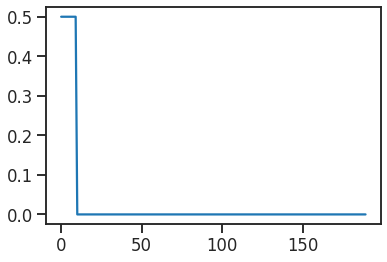

In [136]:
plt.plot(X_adjust["control"])

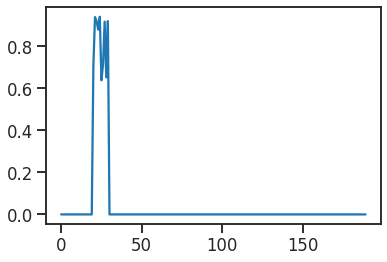

In [145]:
plt.plot(X_adjust["g2"])

In [129]:
B_adjust = B_adjust.T

In [130]:
B_adjust.columns = Y.columns
B_adjust.index = X.columns
B_adjust

,g1,g2,g3,g4,g5,g6,g7,g8,g9,g10,g11,g12,g13,g14,g15,g16,g17,g18
control,-0.000000,-0.000000,-0.045081,0.000000,0.000000,0.000000,-0.000000,0.142789,0.000000,0.000000,-0.000000,-0.000000,-0.080778,0.000000,0.0,0.0,-0.0,0.0
g1,-1.217180,-0.393652,-0.048967,0.001288,0.003798,-0.000000,-0.028501,0.137082,-0.001126,-0.000673,-0.043459,-0.015114,-0.105916,-0.001486,0.0,0.0,0.0,0.0
g2,0.010609,-1.174839,-0.688056,-0.023474,-0.014860,-0.010492,-0.000000,0.080325,0.005548,0.000000,0.028060,0.020416,-0.045503,-0.006384,-0.0,-0.0,-0.0,0.0
g3,0.000000,-0.029763,-1.302181,-0.353796,-0.000000,-0.003935,-0.015584,0.085271,0.000000,0.000000,0.051974,0.017419,-0.109445,-0.002630,-0.0,-0.0,-0.0,-0.0
g4,0.000000,-0.030446,-0.051113,-1.282411,-0.331490,0.007915,-0.004602,0.107313,0.015710,0.028107,0.006122,0.033451,-0.095112,-0.024605,-0.0,-0.0,-0.0,0.0
g5,0.013815,-0.008228,-0.040683,0.025710,-1.212970,-0.292683,0.023965,0.072163,-0.013470,-0.008811,-0.001562,-0.032008,0.005000,0.000178,0.0,0.0,-0.0,0.0
g6,-0.000000,-0.003608,-0.045616,0.005499,-0.001102,-1.133003,-0.371941,0.094950,-0.000000,-0.000451,-0.000000,-0.014893,-0.044221,0.000000,-0.0,0.0,0.0,0.0
g7,-0.021003,0.000000,-0.057178,0.000000,0.009546,0.000000,-1.188058,-0.064648,0.000000,0.000000,0.001843,0.021771,-0.102744,-0.000000,0.0,0.0,0.0,-0.0
g8,0.023318,-0.005006,-0.031367,0.006181,-0.006035,-0.000000,0.015005,-1.117166,-0.206084,-0.092786,0.036940,0.000000,-0.000000,0.005899,0.0,0.0,-0.0,-0.0
g9,-0.011311,0.002412,-0.025735,0.024072,-0.013815,-0.001686,-0.000000,0.099628,-1.195199,-0.737383,-0.055631,-0.035788,-0.031511,0.001067,0.0,0.0,-0.0,0.0


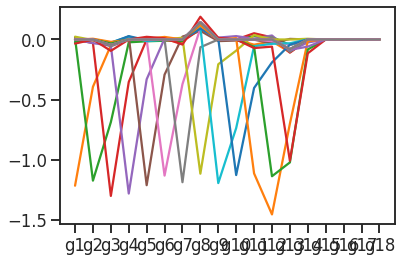

In [131]:
for i in range(18):
    plt.plot(B_adjust.iloc[i,:])

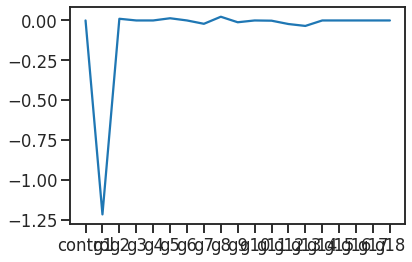

In [132]:
plt.plot(B_adjust['g1'])